# **Geo Spatial data using k means clustering**

In [ ]:
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg' #Decide the default image format for inline figures: SVG or PNG
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import pandas as pd
import numpy as np

from tqdm import tqdm # makes your loops show a progess bar

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

from collections import defaultdict

import hdbscan # HDBSCAN is not available in sklearn.
import folium # Used for plotting geo-spatial data on a map.

# Pre-defining different colors and a long list of it so it can be assigned to different clusters later.
cols = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4',
        '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff',
        '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1',
        '#000075', '#808080']*10

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/maha-prathamesh/Clustering-Geolocation-Data/main/taxi_data.csv')
df.tail()

LON       LAT                   NAME
833  27.82999 -26.24445  Zola Clinic Taxi Rank
834  27.83991 -26.24235         Zola Taxi Rank
835  27.86166 -26.23624        Zondi Taxi Rank
836  28.39097 -26.30931     kwaThema Taxi Rank
837       NaN       NaN                    NaN

In [ ]:
df.shape

(838, 3)

In [ ]:
df.duplicated(subset=['LON','LAT']).values.any()

True

In [ ]:
df.isna().values.any()

True

In [ ]:
print(f'Before dropping NaNs and dupset\t:\tdf.shape={df.shape}')
df.dropna(inplace=True)
print(f'After dropping NaNs \t\t:\tdf.shape={df.shape}')
df.drop_duplicates(subset=['LON','LAT'],keep='first',inplace=True)
print(f'After dropping dupset \t\t:\tdf.shape={df.shape}')

Before dropping NaNs and dupset	:	df.shape=(838, 3)
After dropping NaNs 		:	df.shape=(837, 3)
After dropping dupset 		:	df.shape=(823, 3)


In [ ]:
x=np.array(df[['LON','LAT']],dtype='float64')
x

array([[ 28.17858, -25.73882],
       [ 28.1766 , -25.73795],
       [ 27.83239, -26.53722],
       ...,
       [ 27.83991, -26.24235],
       [ 27.86166, -26.23624],
       [ 28.39097, -26.30931]])

Text(0, 0.5, 'LAT')

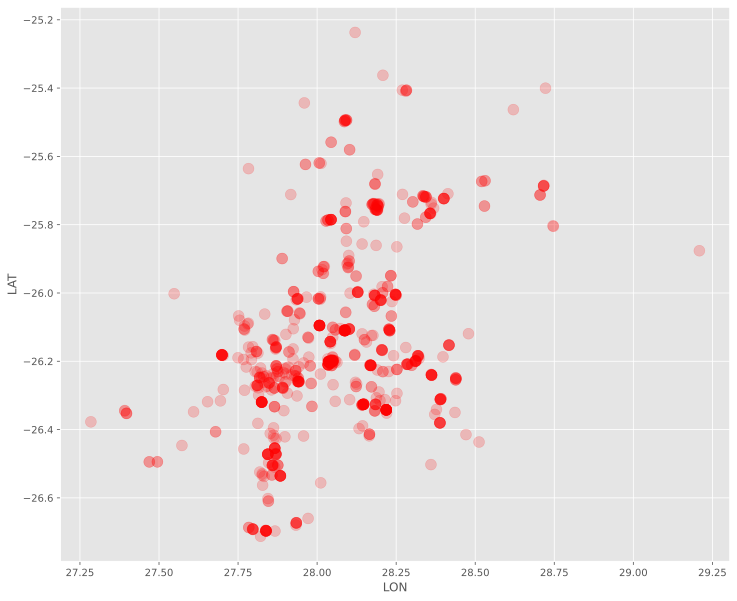

In [ ]:
plt.figure(figsize=(12, 10))
plt.scatter(x[:,0],x[:,1],alpha=0.2,s=120,color='r')
plt.xlabel('LON')
plt.ylabel('LAT')

In [ ]:
import re
m=folium.Map(location=[df['LAT'].mean(),df['LON'].mean()],zoom_start=9,tiles='Stamen Toner',attr='Stamen Toner')

for _, row in df.iterrows():
    folium.CircleMarker(
        location = [row.LAT, row.LON],
        radius = 5,
        popup = re.sub(r'[^a-zA-Z ]+', '',row.NAME), #This code will just keep characters and spaces in a row name.
        #popup = row.NAME,
        colors = '#1787FE',
        fill = True,
        fill_color = '#1787FE').add_to(m)

In [ ]:
m

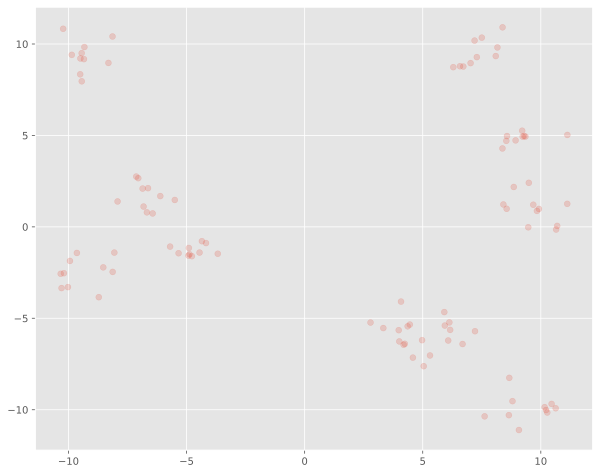

In [ ]:
x_blobs,_=make_blobs(n_samples=100,centers=10,n_features=2,random_state=4,cluster_std=0.8)
plt.figure(figsize=(10, 8))
plt.scatter(x_blobs[:,0],x_blobs[:,1],alpha=0.2)

In [ ]:
class_predictions = np.load('sample_clusters.npy')
import random
cp = class_predictions.copy()
random.shuffle(cp)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


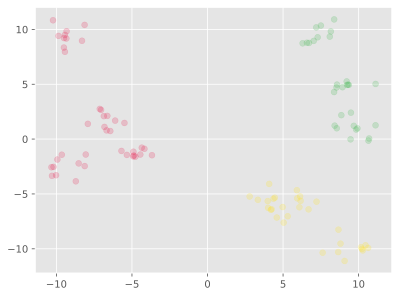

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=4) # You can adjust the number of clusters
class_predictions = kmeans.fit_predict(x_blobs)

# Continue with the rest of your code
unique_clusters = np.unique(class_predictions)
for unique_cluster in unique_clusters:
    x = x_blobs[class_predictions == unique_cluster]
    plt.scatter(x[:,0], x[:,1], alpha = 0.2, c = cols[unique_cluster])

In [ ]:
silhouette_score(x_blobs, class_predictions)

0.644348441894135

In [ ]:
class_predictions=np.load('sample_clusters_improved.npy')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


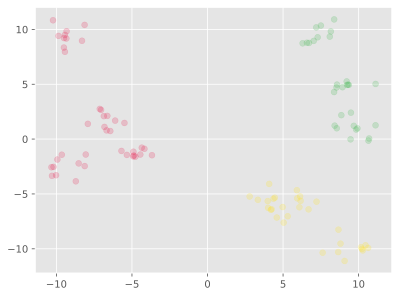

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=4) # You can adjust the number of clusters
class_predictions = kmeans.fit_predict(x_blobs)

# Continue with the rest of your code
unique_clusters = np.unique(class_predictions)
for unique_cluster in unique_clusters:
    x = x_blobs[class_predictions == unique_cluster]
    plt.scatter(x[:,0], x[:,1], alpha = 0.2, c = cols[unique_cluster])

In [ ]:
silhouette_score(x_blobs,class_predictions)

0.644348441894135

In [ ]:
x=df[['LAT','LON']]
k=70
model=KMeans(n_clusters=k,random_state=17).fit(x)
class_predictions=model.predict(x)
df[f'CLUSTER_kmeans{k}']=class_predictions
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


LON       LAT                          NAME  CLUSTER_kmeans70
0  28.17858 -25.73882         11th Street Taxi Rank                 0
1  28.17660 -25.73795    81 Bazaar Street Taxi Rank                 0
2  27.83239 -26.53722          Adams Road Taxi Rank                10
3  28.12514 -26.26666  Alberton City Mall Taxi Rank                32
4  28.10144 -26.10567      Alexandra Main Taxi Rank                26

In [ ]:
def create_map(df, cluster_column):
    '''
    create_map takes in the dataframe and the column with the desired cluster numbers.
    It assigns different colors to each clustered point and plots it on the map.
    Note: the number of clusters are more than the number of colors we have defined above.
    So the colors will be repeated. However if we hover over any taxi rank, the cluster label will pop-up.
    '''
    m = folium.Map(location=[df.LAT.mean(), df.LON.mean()], zoom_start=9, tiles='Stamen Toner', attr='Map tiles by Stamen Design, under CC BY 3.0. Data by OpenStreetMap, under ODbL') # Added attribution for Stamen Toner tiles
    for _, row in df.iterrows():

        if row[cluster_column] == -1: # -1 is for the singleton cases while using DBSCAN and HDBSCAN
            cluster_colour = '#000000'
        else:
            cluster_colour = cols[row[cluster_column]]

        folium.CircleMarker(
            location= [row['LAT'], row['LON']],
            radius=5,
            popup= row[cluster_column],
            color=cluster_colour,
            fill=True,
            fill_color=cluster_colour
        ).add_to(m)
    return m

In [ ]:
m

In [ ]:
best_silhouette, best_k = -1, 0

for k in tqdm(range(50, 120)):
    model = KMeans(n_clusters=k, random_state=1).fit(x)
    class_predictions = model.predict(x)

    curr_silhouette = silhouette_score(x, class_predictions)
    if curr_silhouette > best_silhouette:
        best_k = k
        best_silhouette = curr_silhouette

print(f'K={best_k}')
print(f'Silhouette Score: {best_silhouette}')

  0%|          | 0/70 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
  1%|▏         | 1/70 [00:00<00:09,  7.57it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
  3%|▎         | 2/70 [00:00<00:10,  6.71it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
  4%|▍         | 3/70 [00:00<00:10,  6.42it/s]/usr/loc

K=118
Silhouette Score: 0.7406098194618285


In [ ]:
df['CLUSTER_kmeans108'] = class_predictions
df.head()

LON       LAT                          NAME  CLUSTER_kmeans70  \
0  28.17858 -25.73882         11th Street Taxi Rank                 0   
1  28.17660 -25.73795    81 Bazaar Street Taxi Rank                 0   
2  27.83239 -26.53722          Adams Road Taxi Rank                10   
3  28.12514 -26.26666  Alberton City Mall Taxi Rank                32   
4  28.10144 -26.10567      Alexandra Main Taxi Rank                26   

   CLUSTER_kmeans108  
0                 30  
1                 30  
2                 89  
3                 59  
4                 48

In [ ]:
dummy = np.array([-1, -1, -1, 2, 3, 4, 5, -1])
# comprehension for transforming each -1s into a unique number (it doesn't need to be -ve, but its easier that way
# since the numbers wont mix up with the cluster number.)

numbers = [(x*counter - 2) if x == -1 else x for counter, x in enumerate(dummy)]
model = DBSCAN(eps = 0.01, min_samples = 5).fit(x)
class_predictions = model.labels_
df['CLUSTER_DBSCAN'] = class_predictions
m = create_map(df,'CLUSTER_DBSCAN')

print(f'K={k}')
print(f'Silhouette Score: {silhouette_score(x, class_predictions)}')

K=119
Silhouette Score: 0.2992028902091939


In [ ]:
print(f'Number of clusters found: {len(np.unique(class_predictions))}')
print(f'Number of outliers found: {len(class_predictions[class_predictions==-1])}')

print(f'Silhouette ignoring outliers: {silhouette_score(x[class_predictions!=-1], class_predictions[class_predictions!=-1])}')

no_outliers = 0
no_outliers = np.array([(counter+2)*x if x==-1 else x for counter, x in enumerate(class_predictions)])
print(f'Silhouette outliers as singletons: {silhouette_score(x, no_outliers)}')

Number of clusters found: 51
Number of outliers found: 289
Silhouette ignoring outliers: 0.9232138252477635
Silhouette outliers as singletons: 0.5667489350668198


In [ ]:
m

In [ ]:
model = hdbscan.HDBSCAN(min_cluster_size = 5, min_samples=2, cluster_selection_epsilon=0.01)
class_predictions = model.fit_predict(x)
df['CLUSTER_HDBSCAN'] = class_predictions
m = create_map(df, 'CLUSTER_HDBSCAN')

print(f'Number of clusters found: {len(np.unique(class_predictions))-1}')
print(f'Number of outliers found: {len(class_predictions[class_predictions==-1])}')

print(f'Silhouette ignoring outliers: {silhouette_score(x[class_predictions!=-1], class_predictions[class_predictions!=-1])}')

no_outliers = np.array([(counter+2)*x if x==-1 else x for counter, x in enumerate(class_predictions)])
print(f'Silhouette outliers as singletons: {silhouette_score(x, no_outliers)}')

m

Number of clusters found: 66
Number of outliers found: 102
Silhouette ignoring outliers: 0.7670504358194893
Silhouette outliers as singletons: 0.638992483416951


In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 2)
# Dividing into train and test set
df_train = df[df.CLUSTER_HDBSCAN != -1]
df_test = df[df.CLUSTER_HDBSCAN == -1]
# Dividing into features and target variables
x_train = df_train[['LON','LAT']]
y_train = df_train['CLUSTER_HDBSCAN']

x_test = df_test[['LON','LAT']]
# training the model
classifier.fit(x_train, y_train)
# Model predicitions
y_pred = classifier.predict(x_test)
df['CLUSTER_hybrid'] = df['CLUSTER_HDBSCAN']
# Replacing -1s with predicted cluster numbers. We didn't shuffle the data so the assignment is already ordered.
df.loc[df['CLUSTER_hybrid'] == -1, 'CLUSTER_hybrid'] = y_pred
m = create_map(df, 'CLUSTER_hybrid')
m

In [ ]:
print(f'Number of clusters found: {len(np.unique(class_predictions))}')
print(f'Silhouette: {silhouette_score(x, class_predictions)}')

m.save('hybrid.html')
df.head()

Number of clusters found: 67
Silhouette: 0.5686171942752156


LON       LAT                          NAME  CLUSTER_kmeans70  \
0  28.17858 -25.73882         11th Street Taxi Rank                 0   
1  28.17660 -25.73795    81 Bazaar Street Taxi Rank                 0   
2  27.83239 -26.53722          Adams Road Taxi Rank                10   
3  28.12514 -26.26666  Alberton City Mall Taxi Rank                32   
4  28.10144 -26.10567      Alexandra Main Taxi Rank                26   

   CLUSTER_kmeans108  CLUSTER_DBSCAN  CLUSTER_HDBSCAN  CLUSTER_hybrid  
0                 30               0               19              19  
1                 30               0               19              19  
2                 89              -1               -1              26  
3                 59              -1               -1              41  
4                 48               1               55              55

Text(0.5, 1.0, 'Comparision between Hybrid and K-Means Clustering')

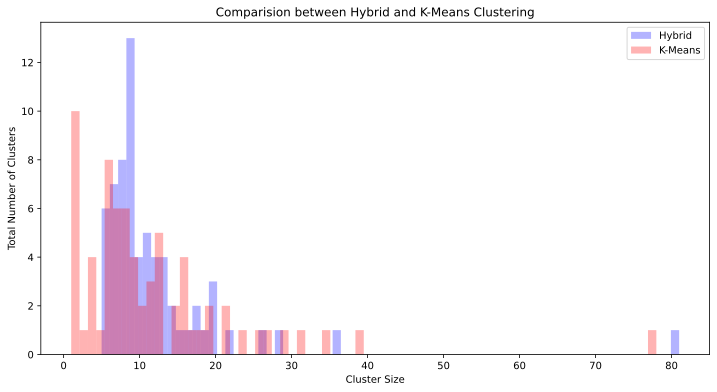

In [ ]:
plt.style.use('default')
plt.figure(figsize = (12,6))

df['CLUSTER_hybrid'].value_counts().sort_values(ascending = True).plot(kind = 'hist',bins = 70, alpha = 0.3,
                                                                       color = 'b', label = 'Hybrid')
df['CLUSTER_kmeans70'].value_counts().sort_values(ascending = True).plot(kind = 'hist',bins = 70, alpha = 0.3,
                                                                         color = 'r', label = 'K-Means')
#df['CLUSTER_hybrid'].value_counts().sort_values(ascending = True).plot(kind = 'barh', alpha = 0.5, color = 'b')


plt.legend()
plt.xlabel('Cluster Size')
plt.ylabel('Total Number of Clusters')
plt.title('Comparision between Hybrid and K-Means Clustering')